In [2]:
!pip install numpy
!pip install tensorflow
!pip install keras
!pip install pillow



1.   Importing libraries
2.   Loading the data
3.   Image Processing
4.   Building the neural network
5.   Training the model
6.   Evaluating the results




In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
# Shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


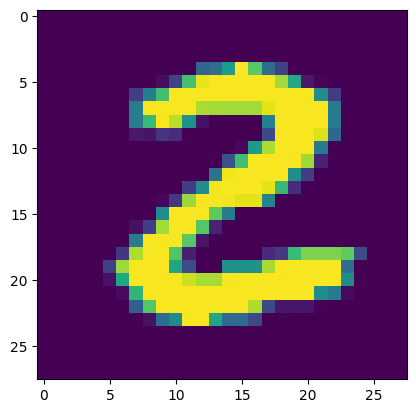

In [7]:
plt.imshow(X_train[25])
plt.show()


In [9]:
# Unique values in Y_train
print(np.unique(Y_train))
# Unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
# Setting up the layers of the Neural  Network
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')])

In [12]:
# Compiling the Neural Network
model.compile(optimizer='adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [13]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2990 - accuracy: 0.9129
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1393 - accuracy: 0.9581
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1023 - accuracy: 0.9681
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0835 - accuracy: 0.9743
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0697 - accuracy: 0.9780
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0598 - accuracy: 0.9818
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9825
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0473 - accuracy: 0.9844
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.036

In [14]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.1274 - accuracy: 0.9735
0.9735000133514404


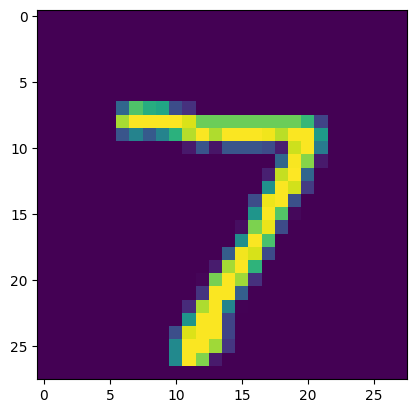

In [15]:
# First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [16]:
print(Y_test[0])

7


In [17]:
Y_pred = model.predict(X_test)
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

313/313 [==============================] - 1s 2ms/step
7
